In [ ]:
## Sales Decline Analysis

### Business Problem
The company has experienced a decline in sales over the past months.
The objective of this analysis is to identify the root causes of this decline
and provide data-driven recommendations to support management decisions.


In [7]:
# -------------------------------
# 1️⃣ Import Libraries
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Display settings for plots
%matplotlib inline
sns.set(style="whitegrid")

# -------------------------------
# 2️⃣ Load Dataset
# -------------------------------
df = pd.read_csv(r"C:\Users\smahm\Desktop\DataProject\sales_decline_dataset.csv")

# Preview first 5 rows
df.head()


,order_date,product_category,product_name,sales_amount,quantity,customer_id,customer_type,region,channel
0,2024-04-12,Electronics,Electronics Product,128.13,3,1458,Returning,West,Online
1,2024-03-28,Clothing,Clothing Product,328.50,4,1413,Returning,North,Online
2,2024-10-20,Electronics,Electronics Product,40.24,4,1699,Returning,South,Offline
3,2024-09-27,Home,Home Product,177.15,4,1831,New,South,Offline
4,2024-05-10,Clothing,Clothing Product,78.40,2,1564,Returning,North,Offline


In [9]:
# -------------------------------
# 3️⃣ Data Overview
# -------------------------------
# Check data types, nulls, and basic stats
df.info()        # Column names, data types, null values
df.describe()    # Descriptive statistics for numeric columns
df.shape         # Number of rows and columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_date        3000 non-null   object 
 1   product_category  3000 non-null   object 
 2   product_name      3000 non-null   object 
 3   sales_amount      3000 non-null   float64
 4   quantity          3000 non-null   int64  
 5   customer_id       3000 non-null   int64  
 6   customer_type     3000 non-null   object 
 7   region            3000 non-null   object 
 8   channel           3000 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 211.1+ KB


(3000, 9)

In [11]:
# -------------------------------
# 4️⃣ Data Cleaning & Feature Engineering
# -------------------------------
# Convert 'order_date' column to datetime
df["order_date"] = pd.to_datetime(df["order_date"])

# Create analytical columns: year, month, month_name
df["year"] = df["order_date"].dt.year
df["month"] = df["order_date"].dt.month
df["month_name"] = df["order_date"].dt.strftime("%B")

# Check for missing values
df.isna().sum()


order_date          0
product_category    0
product_name        0
sales_amount        0
quantity            0
customer_id         0
customer_type       0
region              0
channel             0
year                0
month               0
month_name          0
dtype: int64

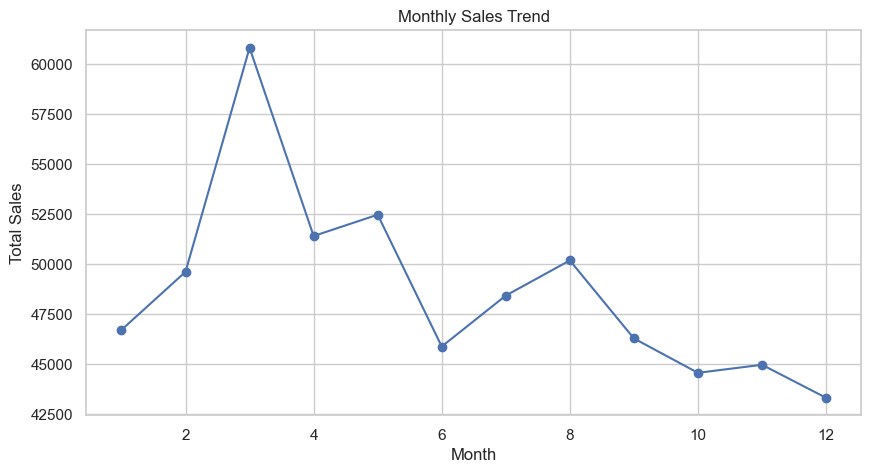

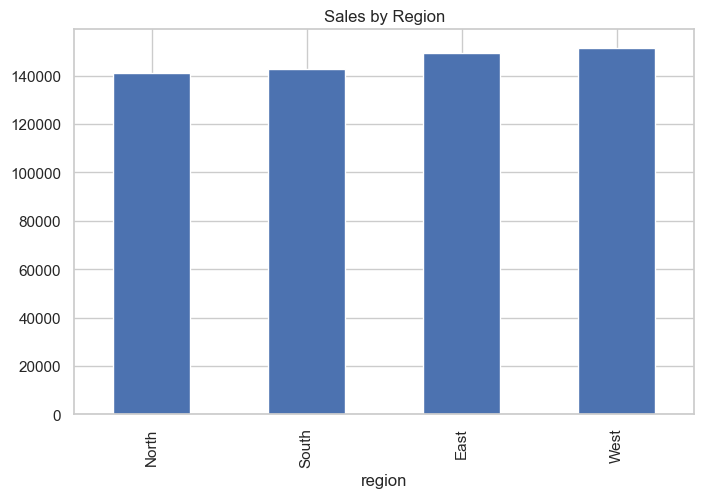

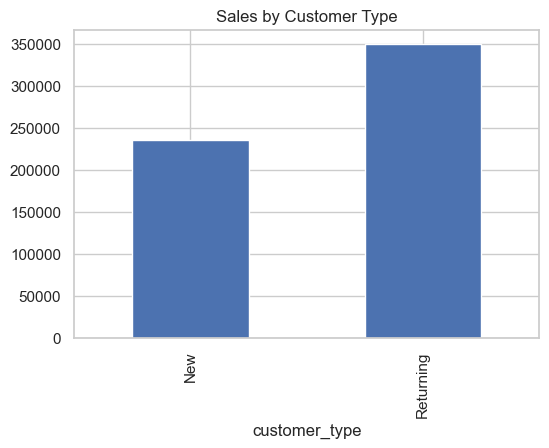

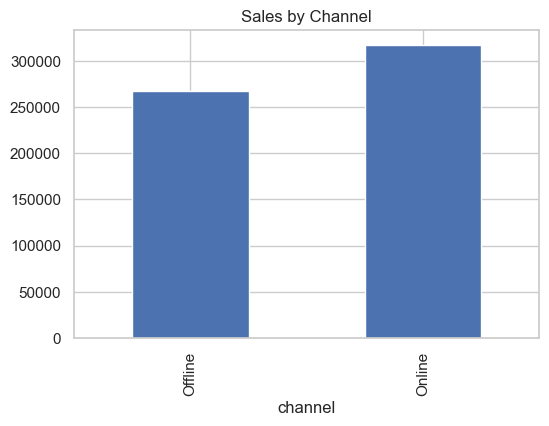

In [13]:
# -------------------------------
# 5️⃣ Exploratory Data Analysis (EDA)
# -------------------------------

# 5.1 Monthly Sales Trend
monthly_sales = df.groupby(["year", "month"])["sales_amount"].sum().reset_index()
plt.figure(figsize=(10,5))
plt.plot(monthly_sales["month"], monthly_sales["sales_amount"], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.show()

# 5.2 Sales by Region
region_sales = df.groupby("region")["sales_amount"].sum().sort_values()
region_sales.plot(kind="bar", title="Sales by Region", figsize=(8,5))
plt.show()

# 5.3 Sales by Customer Type
customer_sales = df.groupby("customer_type")["sales_amount"].sum()
customer_sales.plot(kind="bar", title="Sales by Customer Type", figsize=(6,4))
plt.show()

# 5.4 Sales by Channel (Online vs Offline)
channel_sales = df.groupby("channel")["sales_amount"].sum()
channel_sales.plot(kind="bar", title="Sales by Channel", figsize=(6,4))
plt.show()


In [17]:
# -------------------------------
# 6️⃣ Key Insights
# -------------------------------
# Recommended: use Markdown cell in Jupyter Notebook
"""
### Key Insights
- Sales decline is primarily driven by specific regions, not overall demand.
- Returning customers contribute more significantly to the sales decline.
- Online sales remain more stable compared to offline sales.
"""


'\n### Key Insights\n- Sales decline is primarily driven by specific regions, not overall demand.\n- Returning customers contribute more significantly to the sales decline.\n- Online sales remain more stable compared to offline sales.\n'

In [25]:
# -------------------------------
# 7️⃣ Export Cleaned Data for Power BI
# -------------------------------
df.to_csv(r"C:\Users\smahm\Desktop\DataProject\sales_cleaned_for_powerbi.csv", index=False)
